In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#df = pd.read_csv('../DATA/kc_house_data.csv')

# lecture à partir de Github pour pouvoir éxécuter le notebook sans se soucier d'importer le fichier csv
url = 'https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/kc_house_data.csv'
df = pd.read_csv(url)

In [18]:
df.shape

(21597, 21)

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


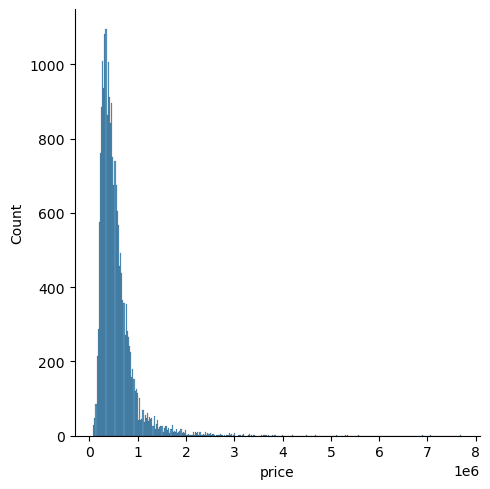

In [23]:
plt.Figure(figsize=(10, 7))
sns.displot( df['price'] )

<Axes: xlabel='bedrooms', ylabel='count'>

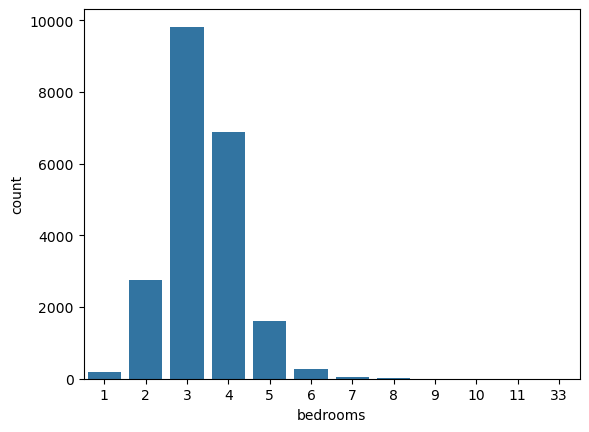

In [27]:
sns.barplot(df['bedrooms'].value_counts())

In [38]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [39]:
df['date'] = pd.to_datetime(df['date'])

In [40]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [48]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
date            -0.003998
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='bedrooms', ylabel='price'>

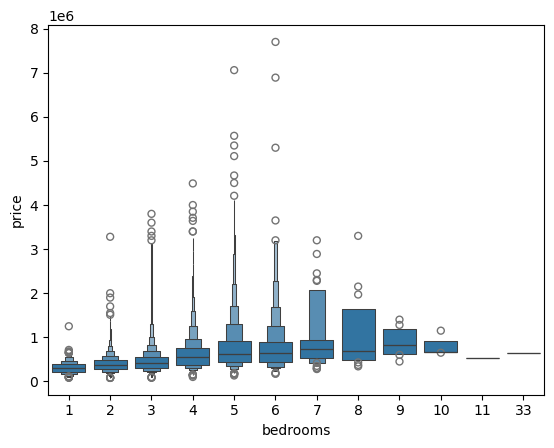

In [50]:
sns.boxenplot( x='bedrooms' , y= 'price' , data= df )

<Axes: xlabel='long', ylabel='lat'>

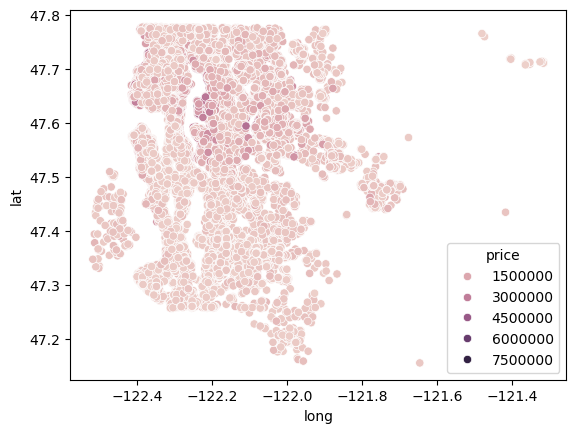

In [52]:
sns.scatterplot( x='long' , y='lat' , data=df , hue='price' )

In [53]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [54]:
df = df.drop('id' , axis=1)

<Axes: xlabel='date', ylabel='price'>

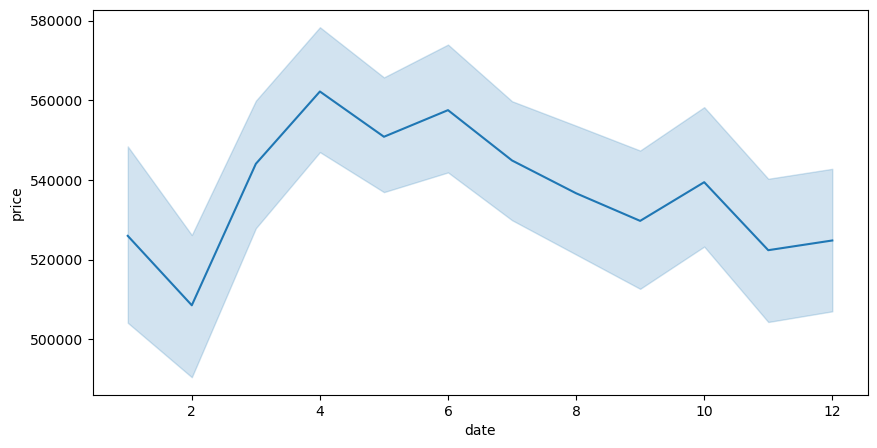

In [66]:
plt.figure(figsize=(10 , 5))
sns.lineplot(x=df['date'].dt.month , y='price' , data=df )

<Axes: xlabel='date', ylabel='price'>

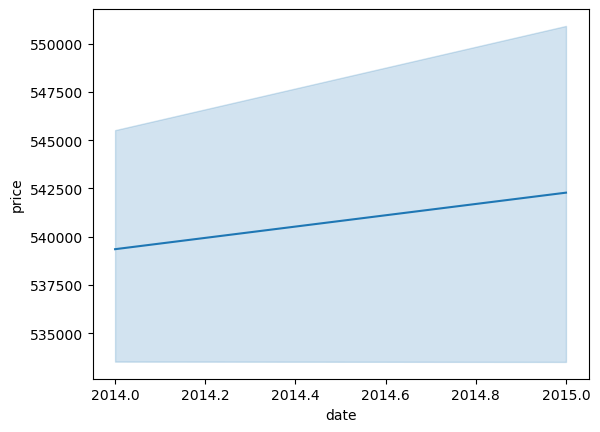

In [67]:
sns.lineplot(x=df['date'].dt.year , y='price' , data=df )

In [68]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [69]:
df = df.drop('zipcode' , axis=1)

In [85]:
X = df.drop(['price' , 'date'] , axis=1).values
y = df['price'].values

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size=0.3 , random_state=101)

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 


In [ ]:
model = Sequential()

model.add(Dense(19 , activation='relu' ))
model.add(Dense(19 , activation='relu' ))
model.add(Dense(19 , activation='relu' ))
model.add(Dense(19 , activation='relu' ))

model.add(Dense(1 ))

model.compile( optimizer='adam' , loss='mse' )


2025-04-08 21:12:13.539743: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-04-08 21:12:13.540050: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-08 21:12:13.540065: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-08 21:12:13.540264: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-08 21:12:13.540279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [96]:
model.fit( x=X_train , y=y_train , validation_data=(X_test , y_test) , batch_size=128 , epochs=300 )

Epoch 1/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 34982420480.0000 - val_loss: 31564728320.0000
Epoch 2/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 31922796544.0000 - val_loss: 31497035776.0000
Epoch 3/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 31753570304.0000 - val_loss: 31336513536.0000
Epoch 4/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 34214670336.0000 - val_loss: 31368357888.0000
Epoch 5/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 34611736576.0000 - val_loss: 31144765440.0000
Epoch 6/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 33153017856.0000 - val_loss: 31060545536.0000
Epoch 7/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 33175924736.0000 - val_loss: 31019565056.0000
Epoch 8/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 32305823744.0000 - val_loss: 30941661184.0000
Epoch 9/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 31458365440.0000 - val_loss: 31003695104.0000
Epoch 10/300
119/119 ━━━━━━━

In [97]:
losses = pd.DataFrame(model.history.history)

<Axes: >

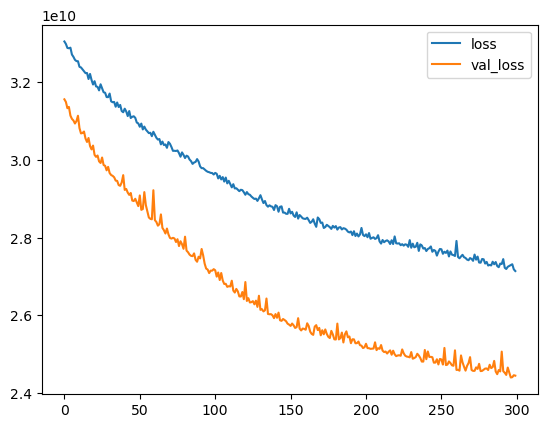

In [98]:
losses.plot()